In [1]:
from trikde.pdfs import DensitySamples, IndependentLikelihoods
from trikde.triangleplot import TrianglePlot
import numpy as np
import matplotlib.pyplot as plt

### Make some mock data 

In [2]:
means = [0.55, 0.8, 0.45]
sigma_11 = 0.15 ** 2
sigma_22 = 0.2 ** 2
sigma_33 = 0.12 ** 2
sigma_12 = - (0.09 ** 2)
sigma_23 = 0.08 ** 2
sigma_13 = 0.07 ** 2

cov = np.array([[sigma_11, sigma_12, sigma_13], 
       [sigma_12, sigma_22, sigma_23], 
       [sigma_13, sigma_23, sigma_33]])
nsamples = 10000
samples = np.random.multivariate_normal(means, cov, nsamples)
assert np.linalg.det(cov) > 0

param_names = ['p1', 'p2', 'p3']
weight_list = None
param_ranges = [[0., 1.25], [0., 1.25], [0., 1.25]]
nbins = 20
use_kde = False
density_samples_no_kde = DensitySamples(samples, param_names, weight_list, param_ranges, 
                                        nbins=nbins, use_kde=False)
density_samples_with_kde = DensitySamples(samples, param_names, weight_list, param_ranges, nbins=nbins, 
                                          use_kde='LINEAR')

independent_densities_no_kde = IndependentLikelihoods([density_samples_no_kde])
independent_densities_with_kde = IndependentLikelihoods([density_samples_with_kde])

nbins = 10
density_samples_no_kde = DensitySamples(samples, param_names, weight_list, param_ranges, 
                                        nbins=nbins, use_kde=False)
independent_densities_no_kde_nbins10 = IndependentLikelihoods([density_samples_no_kde])

nbins = 30
density_samples_no_kde = DensitySamples(samples, param_names, weight_list, param_ranges, 
                                        nbins=nbins, use_kde=False)
independent_densities_no_kde_nbins30 = IndependentLikelihoods([density_samples_no_kde])

## Plot the distributions

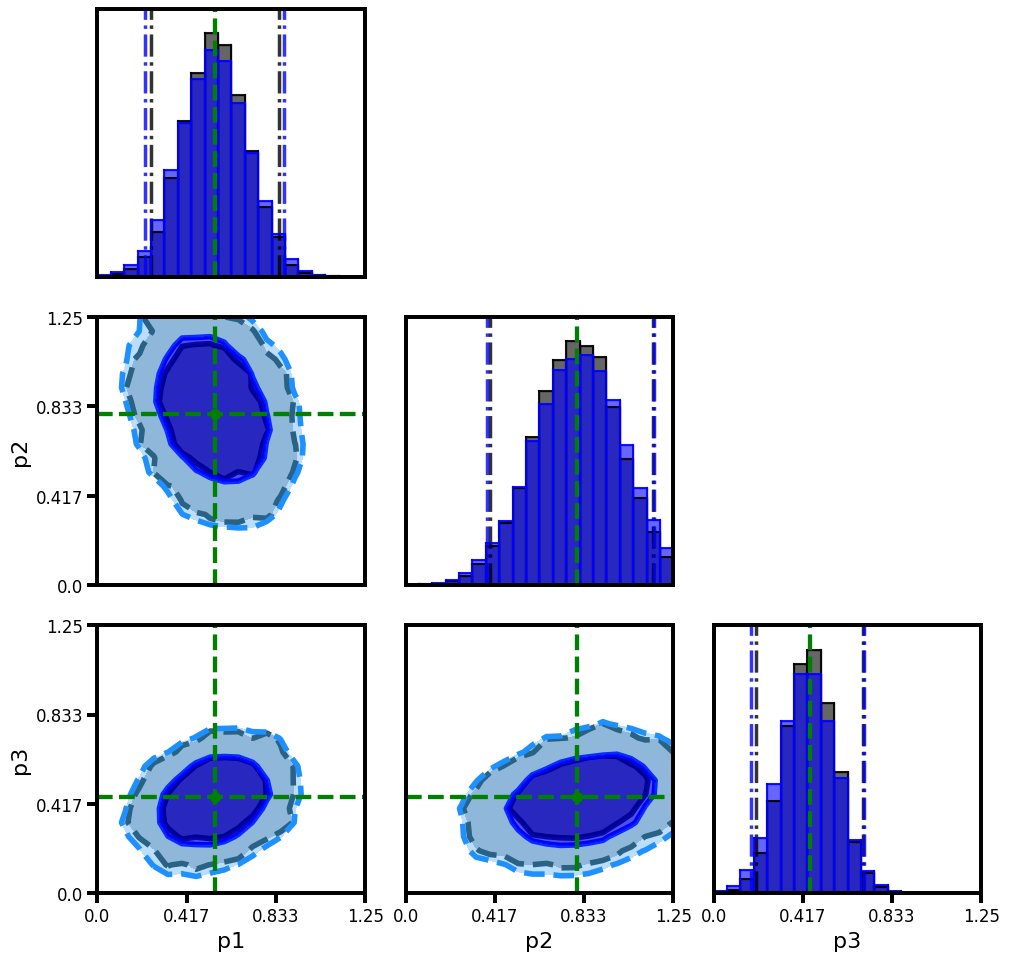

In [3]:
truths = {'p1': means[0], 'p2': means[1], 'p3': means[2]}
pdf_list = [independent_densities_no_kde, 
                        independent_densities_with_kde]
triplot = TrianglePlot(pdf_list)
axes_list = triplot.make_triplot(truths=truths)

### Set up the new classes 

We use different combinations of number of bins in the final pdf, determined "nbins_interp", the resampling option, and the number of draws to use when resampling 

In [4]:
density_samples_linear_kde1 = DensitySamples(samples, param_names, weight_list, param_ranges, nbins=nbins, 
                                          use_kde='LINEAR', 
                                            nbins_eval=10, resampling=False, n_resample=100000)
density_samples_linear_kde2 = DensitySamples(samples, param_names, weight_list, param_ranges, nbins=nbins, 
                                          use_kde='LINEAR', 
                                            nbins_eval=30, resampling=False, n_resample=100000)
density_samples_linear_kde3 = DensitySamples(samples, param_names, weight_list, param_ranges, nbins=nbins, 
                                          use_kde='LINEAR', 
                                            nbins_eval=10, resampling=True, n_resample=100000)
density_samples_linear_kde4 = DensitySamples(samples, param_names, weight_list, param_ranges, nbins=nbins, 
                                          use_kde='LINEAR', 
                                            nbins_eval=30, resampling=True, n_resample=100000)
independent_densities_linear_kde1 = IndependentLikelihoods([density_samples_linear_kde1])
independent_densities_linear_kde2 = IndependentLikelihoods([density_samples_linear_kde2])
independent_densities_linear_kde3 = IndependentLikelihoods([density_samples_linear_kde3])
independent_densities_linear_kde4 = IndependentLikelihoods([density_samples_linear_kde4])

### The native resolution of the PDF, which is used to set up the interpolation, is set by nbins = 20

Here, we compare the estimated pdfs computed at higher resolution (30 bins) without resapling (black) and with resampling (blue)

We see that computing the likelihood at a higher resolution than the native resolution (nbins = 20) leads to some numerical artifacts

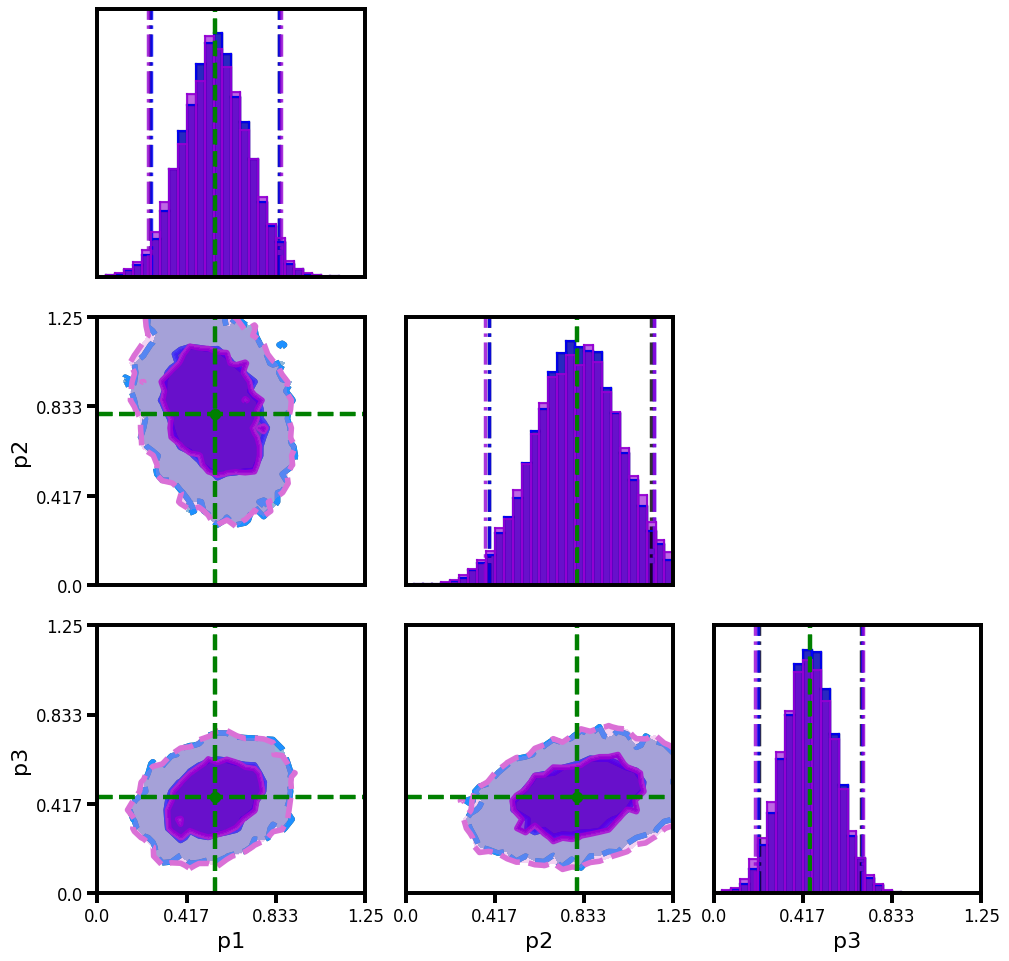

In [5]:
truths = {'p1': means[0], 'p2': means[1], 'p3': means[2]}
pdf_list = [independent_densities_no_kde_nbins30,
    #independent_densities_linear_kde1, # no resampling, nbins = 10
           independent_densities_linear_kde2, # no resampling, nbins = 30
           #independent_densities_linear_kde3, # with resampling, nbins = 10
           independent_densities_linear_kde4 # with resampling, nbins = 30
]
triplot = TrianglePlot(pdf_list)
axes_list = triplot.make_triplot(truths=truths)

### Now we compare the estimated pdfs at a lower resolution without resampling (blue) and with resampling (magenta)

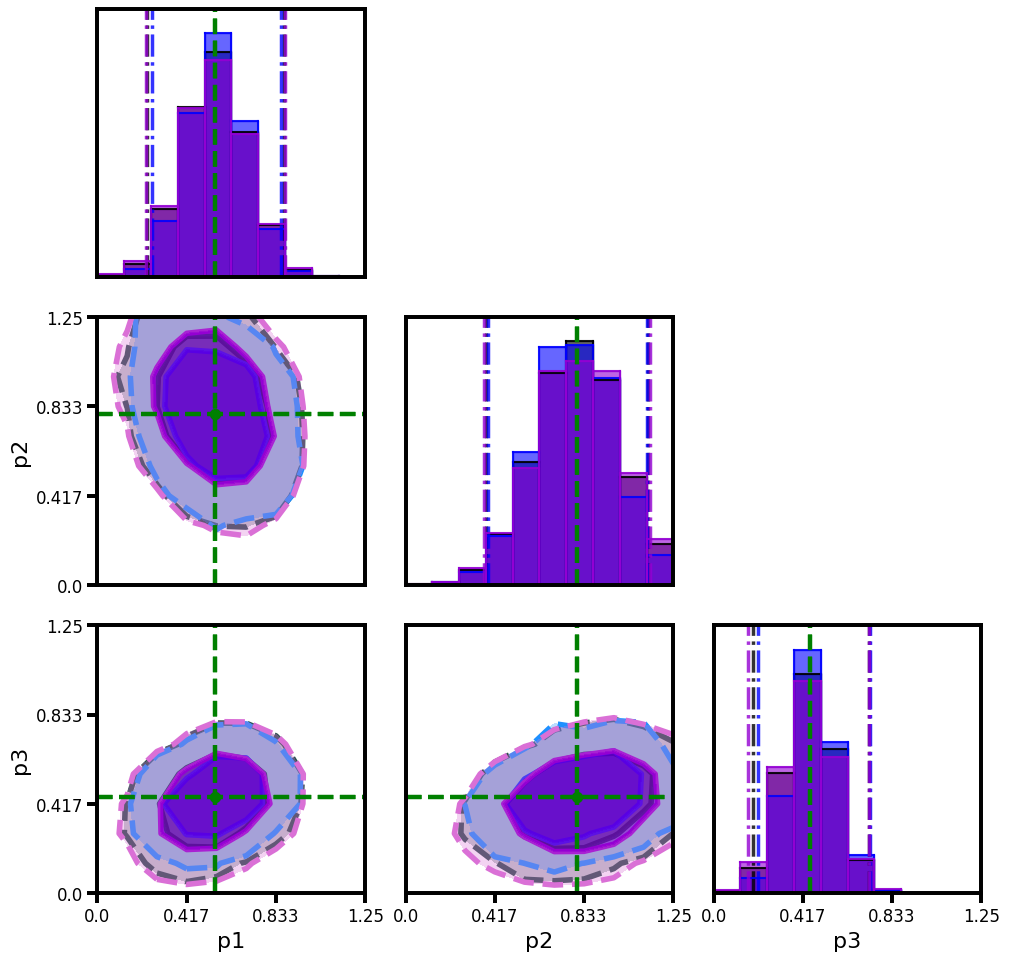

In [6]:
truths = {'p1': means[0], 'p2': means[1], 'p3': means[2]}
pdf_list = [
            independent_densities_no_kde_nbins10,
            independent_densities_linear_kde1, # no resampling, nbins = 10
          # independent_densities_linear_kde2, # no resampling, nbins = 30
           independent_densities_linear_kde3, # with resampling, nbins = 10
               #independent_densities_linear_kde4 # with resampling, nbins = 30
]
triplot = TrianglePlot(pdf_list)
axes_list = triplot.make_triplot(truths=truths)

### Recompute the exact pdf with a native resolution nbins=30

Now compare the new exact pdf with a linear interpolation evaluated at the same native resolution without (blue) and with (magenta) resampling

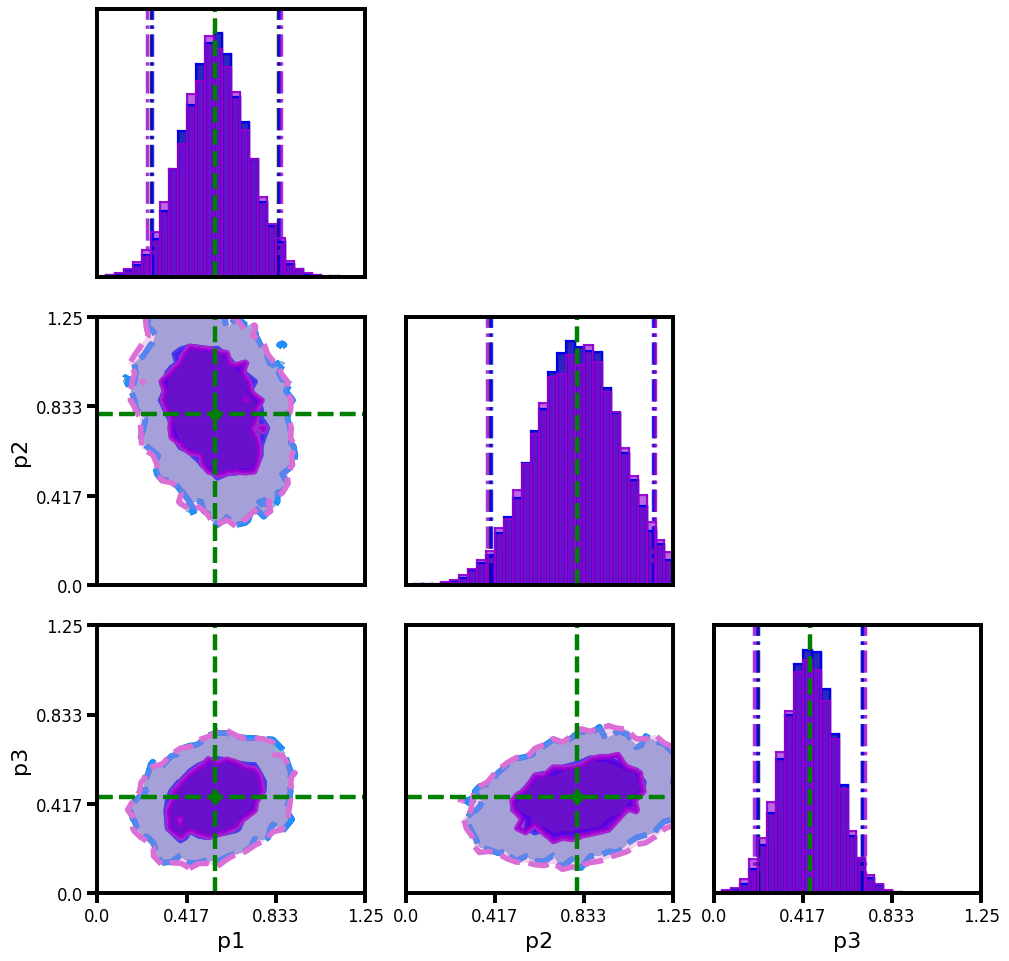

In [7]:
truths = {'p1': means[0], 'p2': means[1], 'p3': means[2]}
pdf_list = [
            density_samples_linear_kde2,
           independent_densities_no_kde_nbins30, # no kde, nbins = 30
           independent_densities_linear_kde4 # with resampling, nbins = 30
]
triplot = TrianglePlot(pdf_list)
axes_list = triplot.make_triplot(truths=truths)